In [47]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from utils.displayData import displayData
from utils.lrCostFunction import lrCostFunction
#from utils.oneVsAll import oneVsAll

In [48]:
input_layer_size  = 400
num_labels = 10

Loading and Visualizing Data ...


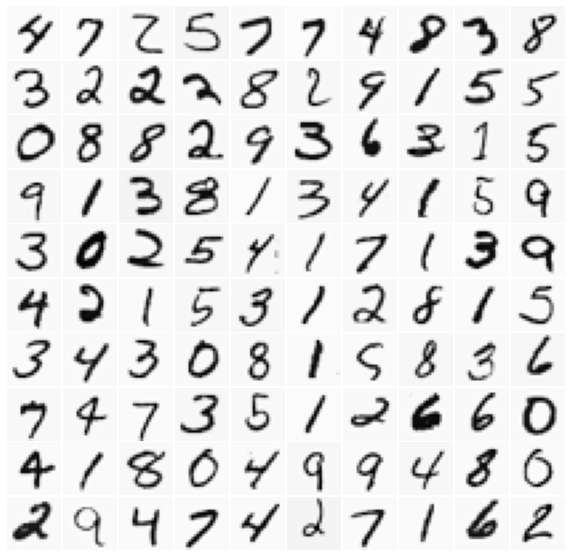

In [49]:
print("Loading and Visualizing Data ...")

data = sio.loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

row,col = X.shape

rand_indices = np.random.permutation(row)
sel = X[rand_indices[:100]]

displayData(sel)

In [50]:
print("Testing lrCostFunction() with regularization\n")

theta_t = np.array([-2, -1, 1, 2]).reshape(4,)

X_0 = np.ones((5,1))
X_test = (np.arange(1,16).reshape(5,3,order="F")) / 10
X_t = np.concatenate((X_0,X_test),axis=1)
y_t = np.array([1,0,1,0,1]).reshape(-1)
l = 3

J,grad = lrCostFunction(theta_t, X_t, y_t, l);

print('Expected cost: 2.534819')
print('Calucalted cost: {:.6f}\n'.format(J))

print('Expected Gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

print('Calculated gradients:\n');
print('{}\n{}\n{}\n{}\n'.format(*grad))

Testing lrCostFunction() with regularization

Expected cost: 2.534819
Calucalted cost: 2.534819

Expected Gradients:

 0.146561
 -0.548558
 0.724722
 1.398003

Calculated gradients:

0.14656136792489802
-0.5485584118531603
0.7247222721092885
1.3980029560717375



In [52]:
from scipy.optimize import minimize


data = sio.loadmat("ex3data1.mat")
c=3

X = data["X"]
row,col = X.shape
X_0 = np.ones((row,1))
X   = np.concatenate((X_0,X),axis=1)

y = data["y"].reshape(-1)
y = np.where(y==10,0,y)
y = np.where(y==3,1,0)


all_theta = np.zeros((num_labels, col + 1))
initial_theta = np.zeros((col+ 1))


options= {'maxiter': 50}

initial_theta.shape

res = minimize(lrCostFunction, 
                initial_theta, 
                (X, y, l), 
                jac=True, 
                method='CG',
                options=options) 